In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

2024-08-01 16:35:29.919403: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 16:35:29.919517: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 16:35:30.064295: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
data = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
def check_df(data, head=5):
  
    print("##################### Shape #####################")
    print(data.shape)
    
    print("##################### Types #####################")
    print(data.dtypes)
    
    print("##################### Duplicated Values #####################")
    print(data.duplicated().sum())
    
    print("##################### Missing Values #####################")
    print(data.isnull().sum())
    
    print("##################### Number of Unique Values #####################")
    print(data.nunique())
  
    print("##################### Head #####################")
    print(data.head(head))
    
check_df(data)

##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### Duplicated Values #####################
0
##################### Missing Values #####################
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
##################### Number of Unique Values #####################
Pregnancies                  17
Glucose                     136
BloodPressure  

<Axes: xlabel='Outcome', ylabel='count'>

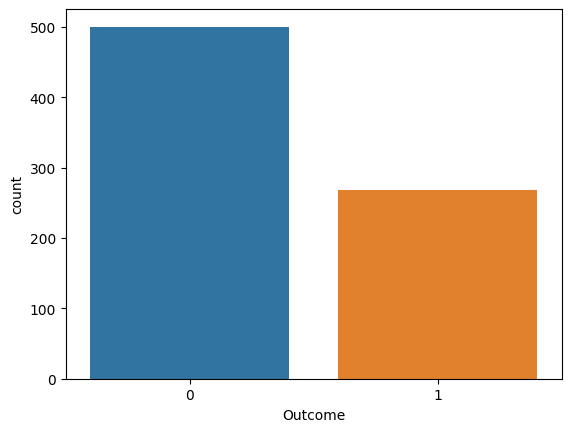

In [6]:
sns.countplot(data = data, x='Outcome')

In [7]:
X = data.drop("Outcome", axis=1)
Y = data["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,shuffle=True, stratify = Y, random_state=42)

In [8]:
input_shape = [x_train.shape[1]]
input_shape

[8]

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=256, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,817 (73.50 KB)

 Trainable params: 18,817 (73.50 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy","precision","recall", keras.metrics.BinaryAccuracy()])

In [11]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=256, epochs=20)

Epoch 1/20
1/3 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.6797 - binary_accuracy: 0.6797 - loss: 4.0468 - precision: 0.0000e+00 - recall: 0.0000e+00

I0000 00:00:1722530144.716295      68 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1722530144.735021      68 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 711ms/step - accuracy: 0.6623 - binary_accuracy: 0.6623 - loss: 3.3332 - precision: 0.3773 - recall: 0.1995 - val_accuracy: 0.3831 - val_binary_accuracy: 0.3831 - val_loss: 3.8928 - val_precision: 0.3525 - val_recall: 0.9074
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4863 - binary_accuracy: 0.4863 - loss: 2.5565 - precision: 0.3886 - recall: 0.7945 - val_accuracy: 0.6364 - val_binary_accuracy: 0.6364 - val_loss: 1.9308 - val_precision: 0.4167 - val_recall: 0.0926
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6345 - binary_accuracy: 0.6345 - loss: 2.0794 - precision: 0.3936 - recall: 0.0757 - val_accuracy: 0.5714 - val_binary_accuracy: 0.5714 - val_loss: 0.9680 - val_precision: 0.4333 - val_recall: 0.7222
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5635 - binary_accuracy: 0.5635 - loss: 1.1013 - precision: 0.4129 - recall: 0.7084 - val_accuracy: 0.5584 - val_binary_accuracy: 0.5584 - val_loss: 1.2933 - v